In [18]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Task 0
Data extraction: get the data from 3 tables & combine it into single `.csv` file.
After that read this file using pandas to create Dataframe.
So it will be all joined data in 1 dataframe. Quick check - should be 74818 rows in it.

In [17]:
import csv
import sqlite3
import os

current_dir = os.getcwd()
parent_dir = os.path.dirname(current_dir)
relative_path = "db.sqlite3"
absolute_path = os.path.join(parent_dir, relative_path)
conn = sqlite3.connect(absolute_path)
cursor = conn.cursor()

order_query = "SELECT * FROM restaurant_order;"
cursor.execute(order_query)
order_data = cursor.fetchall()

order_item_query = "SELECT * FROM restaurant_orderitem;"
cursor.execute(order_item_query)
order_item_data = cursor.fetchall()

product_query = "SELECT * FROM restaurant_product;"
cursor.execute(product_query)
product_data = cursor.fetchall()

data = []
for order in order_data:
    order_id = order[0]
    datetime = order[1]
    for order_item in order_item_data:
        if order_item[2] == order_id:
            product_id = order_item[3]
            quantity = order_item[1]
            for product in product_data:
                if product[0] == product_id:
                    name = product[2]
                    price = product[1]
                    data.append([order_id, datetime, quantity, name, price])

with open("restaurant.csv", "w", newline="") as csvfile:
    writer = csv.writer(csvfile)
    writer.writerow(["Order ID", "Datetime", "Quantity", "Product Name", "Price"])
    writer.writerows(data)

conn.close()
df = pd.read_csv("restaurant.csv")

# Task 1
Get Top 10 most popular products in restaurant sold by Quantity.
Count how many times each product was sold and create a pie chart with percentage of popularity (by quantity) for top 10 of them.

Example:

![pie chart](../demo/pie.png)

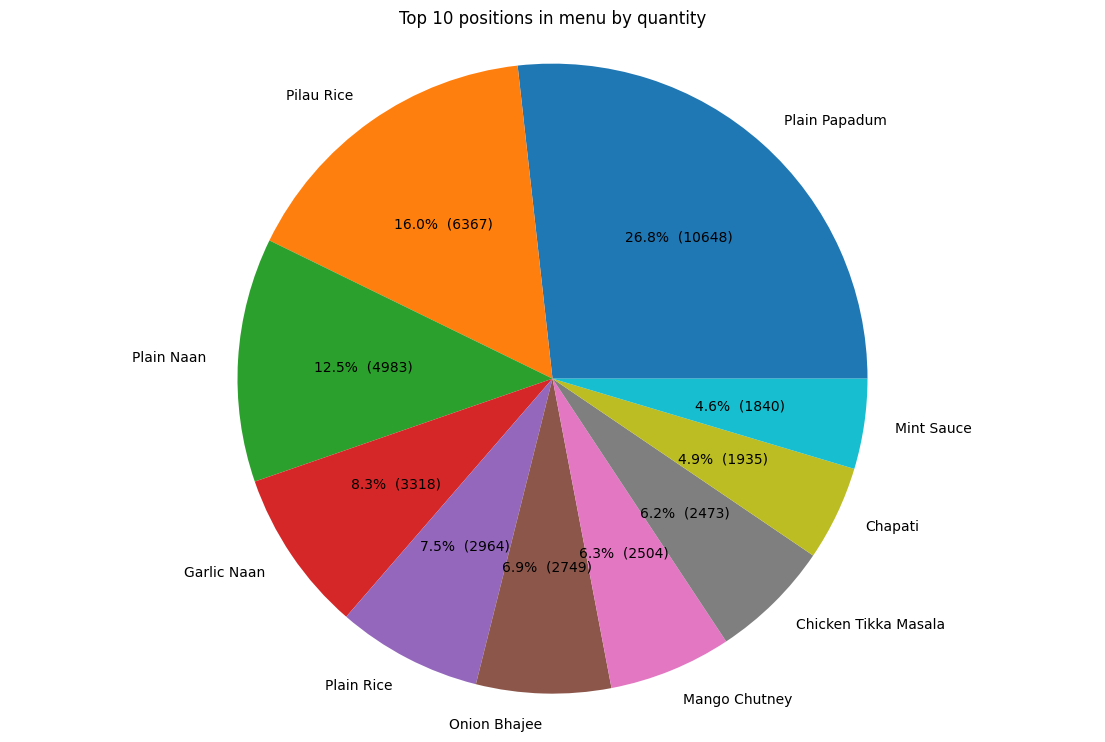

In [50]:
product_quantities_df = df.groupby("Product Name")["Quantity"].sum()
top_10_products = product_quantities_df.nlargest(10)

def make_autopct(values):
    def my_autopct(pct):
        total = sum(values)
        val = int(round(pct*total/100))
        return "{p:.1f}%  ({v:d})".format(p=pct,v=val)
    return my_autopct

plt.figure(figsize=(14, 9))
plt.pie(top_10_products, labels=top_10_products.index, autopct=make_autopct(top_10_products), startangle=0)
plt.axis("equal")
plt.title("Top 10 positions in menu by quantity")
plt.show()

# Task 2
Calculate `Item Price` (Product Price * Quantity) for each Order Item in dataframe.
And Make the same Top 10 pie chart, but this time by `Item Price`. So this chart should describe not the most popular products by quantity, but which products (top 10) make the most money for restaurant. It should be also with percentage.

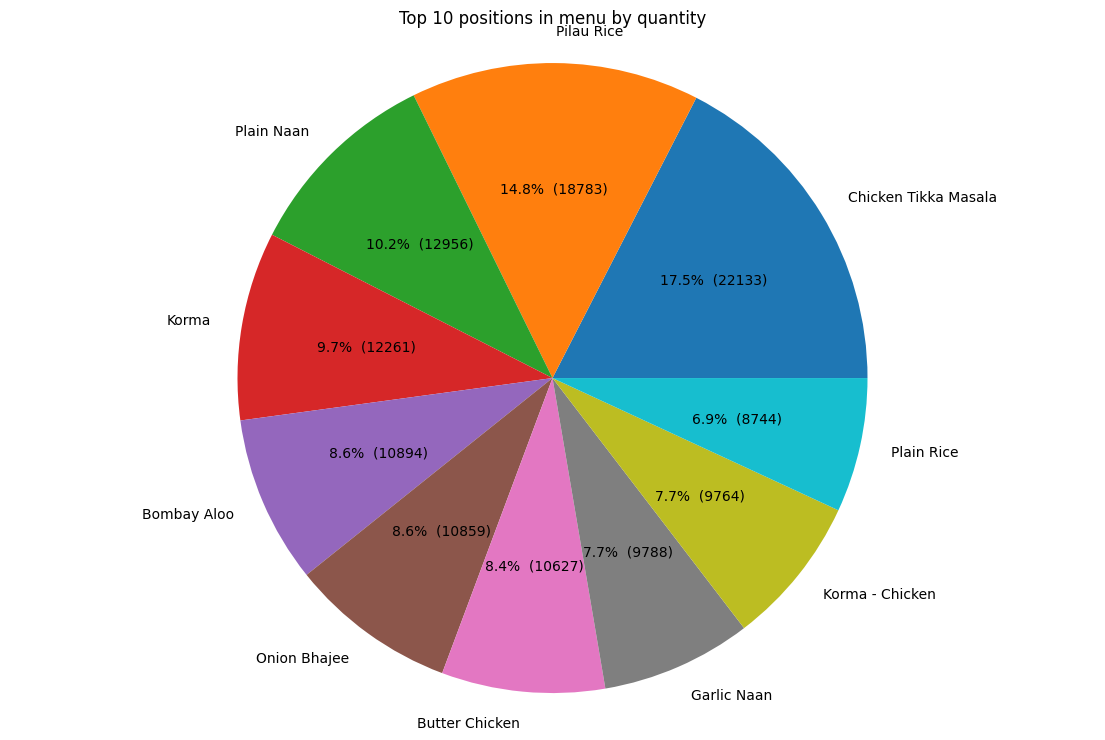

In [51]:
df["Item Price"] = df["Quantity"] * df["Price"]
product_quantities_df = df.groupby("Product Name")["Item Price"].sum()
top_10_products = product_quantities_df.nlargest(10)

def make_autopct(values):
    def my_autopct(pct):
        total = sum(values)
        val = int(round(pct*total/100))
        return "{p:.1f}%  ({v:d})".format(p=pct,v=val)
    return my_autopct

plt.figure(figsize=(14, 9))
plt.pie(top_10_products, labels=top_10_products.index, autopct=make_autopct(top_10_products), startangle=0)
plt.axis("equal")
plt.title("Top 10 most profitable products")
plt.show()

# Task 3
Calculate `Order Hour` based on `Order Datetime`, which will tell about the specific our the order was created (from 0 to 23). Using `Order Hour` create a bar chart, which will tell the total restaurant income based on the hour order was created. So on x-axis - it will be values from 0 to 23 (hours), on y-axis - it will be the total sum of order prices, which were sold on that hour.

Example:

![bar chart](../demo/bar.png)

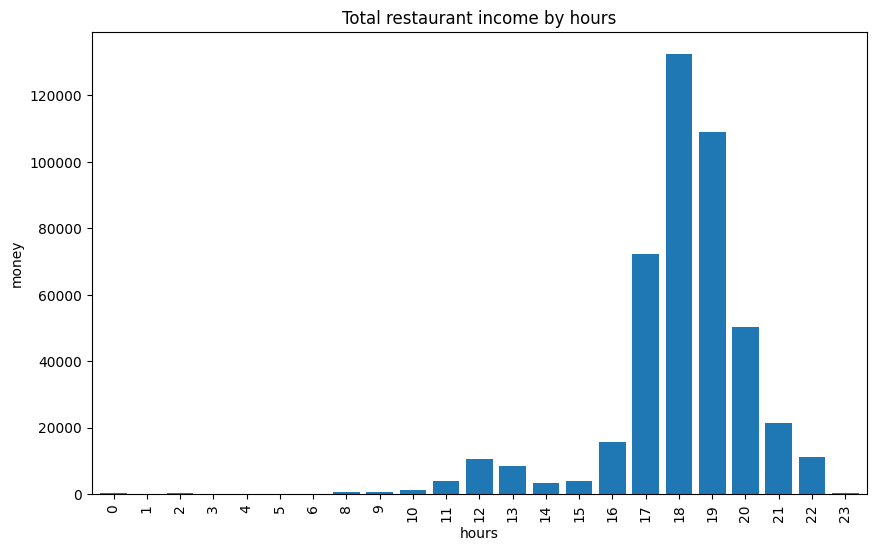

In [96]:
df["Datetime"] = pd.to_datetime(df["Datetime"])
df["Order Hour"] = df["Datetime"].dt.hour
hour_money = df.groupby("Order Hour")["Item Price"].sum()

plt.figure(figsize=(10, 6))
hour_money.plot(kind="bar", width=0.8)
plt.xlabel("hours")
plt.ylabel("money")
plt.title("Total restaurant income by hours")
plt.show()

# Task 4
Make similar bar chart, but right now with `Order Day Of The Week` (from Monday to Sunday), and also analyze total restaurant income by each day of the week.

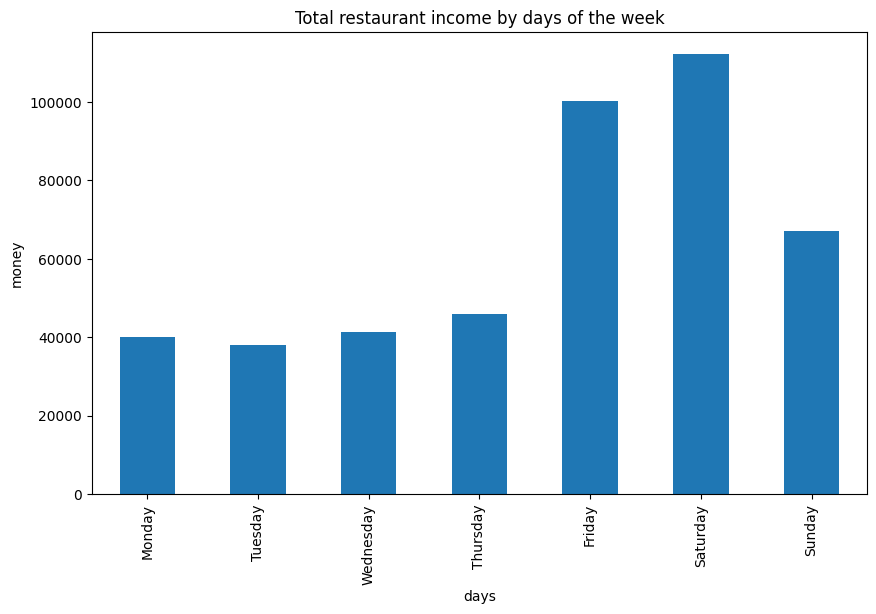

In [97]:
df["Day of Week"] = df["Datetime"].dt.day_name()
day_order = ["Monday", "Tuesday", "Wednesday", "Thursday", "Friday", "Saturday", "Sunday"]
df["Day of Week"] = pd.Categorical(df["Day of Week"], categories=day_order, ordered=True)
df = df.sort_values("Day of Week")
hour_money = df.groupby("Day of Week")["Item Price"].sum()

plt.figure(figsize=(10, 6))
hour_money.plot(kind="bar", width=0.5)
plt.xlabel("days")
plt.ylabel("money")
plt.title("Total restaurant income by days of the week")
plt.show()